# Домашнее задание

In [55]:
# Снижение размерности данных - это важный аспект анализа данных в машинном обучении.
# Этот процесс помогает уменьшить количество признаков в данных,
# сохраняя при этом их значимую информацию. Это может быть полезно для ускорения вычислений,
# избежания проблемы "проклятия размерности", улучшения обобщающей способности моделей и визуализации данных.

# Существует несколько методов снижения размерности данных, таких как
# метод главных компонент (PCA), метод t-распределения стохастическое вложение соседей (t-SNE),
# метод линейного дискриминантного анализа (LDA), метод факторного анализа и многие другие.

# Каждый метод имеет свои сильные и слабые стороны, и выбор конкретного метода
# зависит от характеристик данных и целей исследования.

### 1 Можно ли отобрать наиболее значимые признаки из имеющихся с помощью PCA? Ответ объясните.

Да, с помощью PCA можно отобрать наиболее значимые признаки из имеющихся.

PCA позволяет найти линейные комбинации исходных признаков, которые максимально сохраняют информацию в данных. Эти новые признаки называются главными компонентами, и они упорядочены по важности, с первой главной компонентой, которая объясняет наибольшую дисперсию в данных.

Таким образом, мы можем использовать главные компоненты для отбора наиболее значимых признаков. Мы можем выбрать первые k главных компонент, которые объясняют наибольшую дисперсию в данных, и использовать их в качестве новых признаков. Это позволяет уменьшить размерность данных и улучшить качество моделирования при необходимости.

Также следует отметить, что признаки, которые имеют наименьший вклад в главные компоненты, могут быть отброшены, так как они содержат мало информации о данных и не вносят значительный вклад в предсказание целевой переменной. Однако, необходимо учитывать, что при отборе признаков с помощью PCA может происходить потеря некоторой информации, и важно сбалансировать между уменьшением размерности данных и сохранением нужной информации.

### 2 Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции numpy.linalg.svd(). 
Применить к данным на уроке и сравнить ответы.

Реализуем метод главных компонент с использованием сингулярного разложения с помощью функции numpy.linalg.svd(). Для этого будем использовать следующий алгоритм:

* Центрирование данных, вычитая из каждой колонки среднее значение.
* Вычисление матрицы ковариации данных.
* Вычисление сингулярного разложения матрицы ковариации данных.
* Сортировка сингулярных значений в порядке убывания и соответствующих им сингулярных векторов.
* Выбор наиболее значимых сингулярных векторов для получения новой матрицы признаков с меньшей размерностью.
* Умножение матрицы данных на выбранные сингулярные векто

In [56]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import random

In [57]:
# Объявление функции pca с двумя параметрами: X - матрица данных, и n_components,
# который указывает количество компонент, которые нужно оставить после уменьшения размерности.
def pca(X, n_components):

    # Центрирование данных
    # Вычитает среднее значение каждого столбца (по оси 0)
    # из соответствующих элементов столбцов матрицы X.
    # np.mean(X, axis=0) вычисляет средние значения по столбцам матрицы X,
    # а затем X - np.mean(X, axis=0) вычитает эти средние значения
    # из каждого элемента соответствующего столбца.
    X = X - np.mean(X, axis=0)
    
    # Вычисление матрицы ковариации данных
    # X.T транспонирует матрицу X, чтобы строки стали столбцами, а столбцы - строками,
    # а np.cov() вычисляет матрицу ковариации для транспонированной матрицы X.
    # Матрица ковариации показывает, какие переменные вместе изменяются.
    cov_matrix = np.cov(X.T)
    
    # Вычисление сингулярного разложения матрицы ковариации данных
    # np.linalg.svd() вычисляет сингулярное разложение матрицы cov_matrix,
    # возвращая три массива: U содержит левые сингулярные векторы,
    # S содержит сингулярные значения, а V содержит правые сингулярные векторы.
    U, S, V = np.linalg.svd(cov_matrix)
    
    # Сортировка сингулярных значений в порядке убывания и соответствующих им сингулярных векторов
    idx = np.argsort(-S)
    # Соответствующие сингулярные векторы и значения переупорядочиваются
    # в соответствии с отсортированным порядком сингулярных значений.
    U = U[:, idx]
    S = S[idx]
    
    # Выбор наиболее значимых сингулярных векторов
    U_reduced = U[:, :n_components]
    
    # Умножение матрицы данных на выбранные сингулярные векторы
    # Это производит проекцию центрированных данных на пространство,
    # определенное выбранными сингулярными векторами.
    X_reduced = np.dot(X, U_reduced)
    
    # Возвращается матрица данных с уменьшенной размерностью,
    # в которой оставлены только наиболее значимые компоненты,
    # определенные с использованием PCA.
    return X_reduced

In [58]:
# Загрузим игрушечный датасет из sklearn
iris = datasets.load_iris()
X = iris.data

print(X.shape)

(150, 4)


In [59]:
# Используется для уменьшения размерности набора данных путем преобразования
# его в новый набор переменных, называемых главными компонентами.
X_reduced = pca(X, 2)

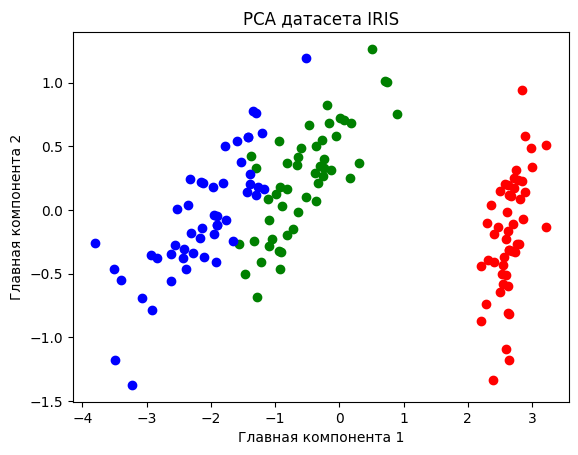

In [60]:
plt.figure()

# Массив, содержащий целевую переменную для набора данных Iris. 
y = iris.target

# Функция zip используется для объединения двух последовательностей данных в кортежи.
# Здесь мы создаем последовательность из букв "rgb" и последовательность из чисел [0, 1, 2].
# Это позволит нам одновременно перебирать итераторы для цветов и меток классов.
for c, i in zip("rgb", [0, 1, 2]):

    # X_reduced[y==i, 0] и X_reduced[y==i, 1] - это срезы массива X_reduced,
    # содержащие значения признаков для образцов, у которых метка класса соответствует i.
    # Это позволяет разместить точки на диаграмме разброса для каждого класса.
    # c=c - это аргумент функции plt.scatter, который определяет цвет точек на диаграмме разброса.
    # В каждой итерации цикла c содержит один из цветов из последовательности "rgb".
    plt.scatter(X_reduced[y==i, 0], X_reduced[y==i, 1], c=c)
    
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

### Рисунок получился зеркальный относительно того, что был на уроке

### 3 Обучить любую модель классификации (используем случайный лес) на датасете IRIS до применения PCA и после него. Сравнить качество классификации по отложенной выборке.

In [61]:
#Реализуем генерацию  𝑁   бутстрэп-выборок и подмножества признаков для нахождения разбиения в узле.

random.seed(42)

# data представляет собой данные, labels - метки классов для этих данных,
# а N - количество бутстрэп-выборок, которые мы хотим сгенерировать.
def get_bootstrap(data, labels, N):

    # количество образцов в данных.
    n_samples = data.shape[0]

    # список, в который мы будем добавлять бутстрэп-выборки.
    bootstrap = []
    
    for i in range(N):

        # Создают массивы нулей такой же формы, как data и labels.
        # b_data и b_labels - это массивы, которые будут представлять
        # бутстрэп-выборку данных и меток классов соответственно.
        b_data = np.zeros(data.shape)
        b_labels = np.zeros(labels.shape)
        
        # Вложенный цикл, который будет выполнен для каждого образца в данных.
        for j in range(n_samples):

            # Генерирует случайное целое число от 0 до n_samples-1,
            # представляющее индекс случайного образца в данных.
            sample_index = random.randint(0, n_samples-1)

            # Копируют данные и соответствующие метки классов для случайно выбранного образца
            # из исходных данных в соответствующие позиции в бутстрэп-выборке.
            b_data[j] = data[sample_index]
            b_labels[j] = labels[sample_index]

        # добавление кортежа (b_data, b_labels) в список bootstrap.
        bootstrap.append((b_data, b_labels))
    
    return bootstrap

In [62]:
# len_sample - это аргумент функции, представляющий длину выборки.
def get_subsample(len_sample):
    # будем сохранять не сами признаки, а их индексы
    # генератор списка, который создает список индексов от 0 до len_sample - 1.
    sample_indexes = [i for i in range(len_sample)]
    
    # Длина подвыборки, которая будет создана.
    len_subsample = int(np.sqrt(len_sample))

    # Список, в который мы будем добавлять индексы элементов подвыборки.
    subsample = []
    
    # Перемешивает элементы списка sample_indexes в случайном порядке.
    # Это помогает случайно выбирать индексы для подвыборки.
    random.shuffle(sample_indexes)

    # Цикл, который будет выполняться len_subsample раз.
    # Используется _, потому что мы не используем переменную цикла.
    for _ in range(len_subsample):

        # Удаляет и возвращает последний элемент списка.
        # Это позволяет извлечь случайный индекс из перемешанного списка sample_indexes.
        subsample.append(sample_indexes.pop())
        
    return subsample

In [63]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведётся сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [64]:
# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    # метод класса Leaf, который используется для прогнозирования метки класса терминального узла.
    def predict(self):
        # подсчёт количества объектов разных классов
        classes = {}  # сформируем словарь "класс: количество объектов"
        # Считает количество объектов каждого класса в узле
        # путем прохода по всем меткам классов в self.labels
        # и увеличения соответствующего значения в словаре classes.
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        #  найдём класс, количество объектов которого будет максимальным в этом листе, и вернём его    
        prediction = max(classes, key=classes.get)
        return prediction    

In [65]:
# Расчёт критерия Джини

# Определение функции с именем gini, которая
# принимает на вход список меток классов labels.
def gini(labels):
    #  подсчёт количества объектов разных классов
    # Создание пустого словаря classes, в который мы
    # будем считать количество объектов каждого класса.
    classes = {}

    # Выполняет подсчет количества объектов каждого класса в списке labels.
    # Мы проходим по всем меткам классов, и если класс еще не встречался,
    # мы добавляем его в словарь classes с начальным значением 0,
    # затем увеличиваем счетчик для этого класса.
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  расчёт критерия
    # В критерии Джини мы начинаем с максимально возможной неопределенности
    # (неопределенности при разделении выборки на классы).
    impurity = 1

    # Рассчитывает значение критерия Джини. Мы проходим по всем классам в словаре classes
    # и для каждого класса рассчитываем вероятность p, как отношение
    # количества объектов этого класса к общему количеству объектов.
    # Затем мы вычитаем квадрат этой вероятности из переменной impurity.
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p ** 2
        
    return impurity

In [66]:
# Расчёт качества

# Будет рассчитывать качество разбиения узла.
# Принимает три аргумента: left_labels, right_labels и current_gini.
# left_labels и right_labels представляют метки классов объектов,
# которые попали в левое и правое поддерево соответственно,
# а current_gini представляет собой текущее значение критерия Джини для узла.
def quality(left_labels, right_labels, current_gini):

    # Вычисляет долю выборки, которая попала в левое поддерево.
    # Для этого мы сначала находим количество объектов
    # в левом поддереве с помощью left_labels.shape[0],
    # затем делим его на общее количество объектов в левом и правом поддереве
    # (left_labels.shape[0] + right_labels.shape[0]).
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    # Возвращает значение качества разбиения узла.
    # Мы вычитаем из текущего значения критерия Джини current_gini сумму двух слагаемых:
    # первое слагаемое равно произведению доли выборки
    # в левом поддереве на критерий Джини для левого поддерева,
    # а второе слагаемое равно произведению доли выборки
    # в правом поддереве на критерий Джини для правого поддерева.
    # Таким образом, мы оцениваем, как изменится критерий Джини
    # при разбиении узла на левое и правое поддеревья.
    return current_gini - p * gini(left_labels) - (1 - p) * gini(right_labels)

In [67]:
# Разбиение датасета в узле

# Будет выполнять разбиение датасета по заданному признаку и порогу.
# Принимает четыре аргумента: data, labels, index и t.
# data представляет собой массив данных, labels - массив меток классов,
# index - индекс признака, по которому производится разбиение, а t - порог разбиения.
def split(data, labels, index, t):
    
    # np.where(data[:, index] <= t) - это вызов функции np.where,
    # который возвращает индексы элементов массива data,
    # где значение признака с индексом index меньше или равно порогу t.
    # Аналогично, np.where(data[:, index] > t) возвращает индексы элементов,
    # где значение признака больше порога.
    # left и right - это кортежи с индексами элементов, разделенных по порогу.
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
    
    # Создает четыре переменные: true_data, false_data, true_labels и false_labels.
    # В них мы записываем соответствующие части данных и меток классов, разделенных по порогу t.
    # То есть, true_data и true_labels содержат данные и метки классов,
    # где значение признака с индексом index меньше или равно t,
    # а false_data и false_labels содержат данные и метки классов,
    # где значение признака больше t.
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [68]:
# Нахождение наилучшего разбиения

# Определение функции с именем find_best_split,
# которая принимает два аргумента: data и labels.
# data представляет собой массив данных, а labels - массив меток классов.
def find_best_split(data, labels):
    
    # Задание минимального количества объектов в узле.
    # Это значение используется для фильтрации разбиений,
    # чтобы предотвратить создание слишком маленьких узлов.
    min_leaf = 5

    # Вычисление начального значения критерия Джини для текущего узла.
    current_gini = gini(labels)

    # Инициализируют переменные, которые будут хранить лучшее качество разбиения,
    # лучший порог и индекс признака, по которому будет производиться разбиение.
    best_quality = 0
    best_t = None
    best_index = None
    
    # Определение количества признаков в данных.
    n_features = data.shape[1]
    
    # выбор индекса из подвыборки длиной sqrt(n_features)
    subsample = get_subsample(n_features)
    
    # Проходит по всем признакам из подвыборки subsample
    # и для каждого признака создает список его значений t_values.
    for index in subsample:
        t_values = [row[index] for row in data]
        
        # Проходит по всем значениям порога t для текущего признака
        # и для каждого значения производит разбиение данных
        # на два поддерева с помощью функции split().
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

            #  пропускаем разбиения, где в узле остаётся менее пяти объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            # Вычисление качества разбиения с помощью функции quality().
            current_quality = quality(true_labels, false_labels, current_gini)
            
            # Проверяет, превосходит ли текущее качество разбиения лучшее качество best_quality.
            # Если да, то обновляются переменные best_quality, best_t и best_index
            # для сохранения текущего наилучшего разбиения.
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    # Возврат наилучшего качества разбиения, лучшего порога
    # и индекса признака для этого разбиения из функции после ее выполнения.
    return best_quality, best_t, best_index

In [69]:
# Построение дерева посредством рекурсивной функции

# Определение функции с именем build_tree,
# которая принимает два аргумента: data и labels.
# data представляет собой массив данных, а labels - массив меток классов.
def build_tree(data, labels):

    # Вызов функции find_best_split, которая находит
    # лучшее разбиение данных на два поддерева.
    # Значения quality, t и index содержат соответственно качество разбиения,
    # порог разбиения и индекс признака для этого разбиения.
    quality, t, index = find_best_split(data, labels)

    #  Базовый случай — прекращаем рекурсию, когда нет прироста качества
    # Проверяет, равно ли качество разбиения нулю. Если да, то это означает,
    # что дальнейшее разбиение не улучшит качество,
    # и мы возвращаем терминальный узел Leaf,
    # который содержит текущие данные и метки классов.
    if quality == 0:
        return Leaf(data, labels)

    # Разбиение данных на два поддерева с использованием функции split.
    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree(true_data, true_labels)
    false_branch = build_tree(false_data, false_labels)

    # Возврат узла дерева, который содержит информацию
    # о текущем разбиении (индекс признака и порог),
    # а также ссылки на два поддерева true_branch и false_branch.
    return Node(index, t, true_branch, false_branch)

In [70]:
# Определение функции random_forest, которая принимает три аргумента:
# data, labels и n_trees. data представляет собой массив данных,
# labels - массив меток классов, а n_trees - количество деревьев в лесу.
def random_forest(data, labels, n_trees):

    # Будет содержать деревья решений в случайном лесу.
    forest = []

    # Вызов функции get_bootstrap, которая создает
    # n_trees случайных подвыборок данных и меток классов методом бутстрапа.
    bootstrap = get_bootstrap(data, labels, n_trees)
    
    # Цикл, который проходит по каждой паре подвыборки данных и меток классов в bootstrap.
    for b_data, b_labels in bootstrap:

        # Добавление в список forest нового дерева решений,
        # построенного на текущей подвыборке данных b_data
        # и соответствующих метках классов b_labels.
        # Для построения дерева используется функция build_tree.
        forest.append(build_tree(b_data, b_labels))
    
    # Возврат списка forest, содержащего все деревья, построенные в случайном лесу.
    return forest

In [71]:
# Функция классификации отдельного объекта

# Будет классифицировать отдельный объект.
# Определение функции classify_object, которая принимает два аргумента:
# obj (объект, который нужно классифицировать) и node (текущий узел дерева).
def classify_object(obj, node):

    # Останавливаем рекурсию, если достигли листа
    # Проверяет, является ли текущий узел листовым.
    # Если да, то функция возвращает прогноз, хранящийся в этом листе.
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    # Выполняется, если текущий узел не является листовым.
    # Он проверяет значение признака объекта obj по индексу, хранящемуся в текущем узле node.index,
    # и сравнивает его с порогом node.t. Если значение меньше или равно порогу,
    # функция рекурсивно вызывает себя для левого поддерева node.true_branch.
    # В противном случае, она вызывает себя для правого поддерева node.false_branch.
    # Этот процесс продолжается до тех пор, пока не будет достигнут листовой узел,
    # который вернет прогноз для объекта.
    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

In [72]:
# функция формирования предсказания по выборке на одном дереве

# Формирует предсказания по выборке с использованием одного дерева.
# Определение функции predict, которая принимает два аргумента:
# data (выборка данных, для которой нужно сделать предсказание)
# и tree (дерево решений, на основе которого будет делаться предсказание).
def predict(data, tree):
    
    # Создание пустого списка classes, в который будут добавляться
    # предсказанные метки классов для каждого объекта выборки.
    classes = []

    # начало цикла, который перебирает каждый объект obj в выборке данных data.
    for obj in data:

        # Вызов функции classify_object, которая классифицирует
        # текущий объект obj с помощью дерева tree и возвращает
        # предсказанную метку класса для этого объекта.
        prediction = classify_object(obj, tree)

        # Добавление предсказанной метки класса prediction в список classes.
        classes.append(prediction)

    # возврат списка classes, содержащего предсказанные метки классов для всех объектов выборки.
    return classes

In [73]:
# предсказание голосованием деревьев

# Будет делать предсказания на основе голосования по деревьям в лесу.
# Определение функции tree_vote, которая принимает два аргумента:
# forest (список деревьев решений) и data (выборка данных, для которой нужно сделать предсказание).
def tree_vote(forest, data):

    # Происходит формирование списка predictions, который
    # будет содержать предсказания для каждого дерева из леса forest.
    # Для каждого дерева tree в лесу вызывается функция predict
    # с аргументами data и tree, результат добавляется в список predictions.
    predictions = []
    for tree in forest:
        predictions.append(predict(data, tree))
    
    # Создание списка predictions_per_object, в котором
    # предсказания каждого дерева объединяются в кортежи по объектам.
    # Это делается с помощью функции zip(*predictions),
    # которая транспонирует список predictions (делает из него список кортежей,
    # содержащих предсказания для каждого объекта).
    predictions_per_object = list(zip(*predictions))
    
    # выберем в качестве итогового предсказания для каждого объекта то,
    # за которое проголосовало большинство деревьев
    voted_predictions = []
    for obj in predictions_per_object:
        voted_predictions.append(max(set(obj), key=obj.count))
    
    # Возврат списка voted_predictions, содержащего
    # итоговые предсказания для всех объектов выборки data.
    return voted_predictions

In [74]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
# Загрузим датасет IRIS
iris = load_iris()
X = iris.data
y = iris.target

In [75]:
# Разобьем выборку на обучающую и тестовую
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.3, random_state=41)


In [76]:
# Введём функцию подсчёта точности как доли правильных ответов

# Определение функции accuracy_metric, которая принимает два аргумента:
# actual (фактические метки классов) и predicted (предсказанные метки классов).
def accuracy_metric(actual, predicted):

    # Будет хранить количество правильных предсказаний.
    correct = 0

    # Начало цикла, который будет перебирать индексы от 0 до длины списка actual
    # (или predicted, потому что они оба имеют одинаковую длину).
    for i in range(len(actual)):

        # Проверяет, совпадают ли фактическая метка класса actual[i]
        # и предсказанная метка класса predicted[i] для каждого объекта выборки.
        # Если они совпадают, то значение переменной correct увеличивается на 1.
        if actual[i] == predicted[i]:
            correct += 1

    # Возврат значения точности модели в процентах.
    # Доля правильных ответов (количество правильных предсказаний) делится
    # на общее количество объектов выборки (len(actual))
    # и затем умножается на 100.0, чтобы получить процентное значение.
    return correct / float(len(actual)) * 100.0

In [77]:
# Определение функции metrics_random_forest, которая принимает три аргумента:
# train_data (обучающие данные), train_labels (метки классов для обучающих данных)
# и n_trees (количество деревьев в случайном лесе).
def metrics_random_forest(train_data, train_labels, n_trees):

    # Создает случайный лес с использованием функции random_forest.
    my_forest = random_forest(train_data, train_labels, n_trees)

    # Используется функция tree_vote, которая, принимает на вход случайный лес (my_forest)
    # и обучающие данные (train_data), и возвращает предсказанные значения для обучающих данных.
    train_answers = tree_vote(my_forest, train_data)

    # Строка аналогична предыдущей, но используется для получения
    # предсказанных значений для тестовых данных (test_data).
    test_answers = tree_vote(my_forest, test_data)

    # Точность на обучающей выборке
    # Использует функцию accuracy_metric, чтобы вычислить точность модели на обучающих данных.
    # Она сравнивает фактические метки (train_labels) с предсказанными метками (train_answers)
    # и возвращает процент правильных предсказаний.
    train_accuracy = accuracy_metric(train_labels, train_answers)

    # Точность на тестовой выборке
    # Аналогично предыдущей строке, но используются тестовые метки (test_labels)
    # и предсказанные значения для тестовых данных (test_answers).
    test_accuracy = accuracy_metric(test_labels, test_answers)

    # Возвращает точность модели на тестовых данных. 
    return test_accuracy

In [78]:
print(metrics_random_forest(train_data, train_labels, 2))

91.11111111111111


In [79]:
# Применим PCA для уменьшения размерности данных
X_reduced = pca(X, 2)

In [80]:
# Разобьем выборку на обучающую и тестовую
train_data, test_data, train_labels, test_labels = train_test_split(X_reduced, y, test_size=0.3, random_state=41)


In [81]:
print(metrics_random_forest(train_data, train_labels, 2))

80.0


Мы видим, что после применения PCA качество модели ухудшилось. Однако, здесь мы использовали только 2 главных компоненты вместо 4 исходных признаков. Если мы используем больше главных компонент, то может улучшиться качество модели. Но также важно учитывать, что применение PCA может привести к потере некоторой информации, что также может ухудшить качество модели.